In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
tf.random.set_seed(42)

C:\Users\ASUS\anaconda3\envs\ten\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\envs\ten\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\envs\ten\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Loading data and creating data partitions

### 50 per class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_50 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_50():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_50.append([new_array, class_num])
            if i == 50:
                break

create_training_data_50()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_50)

In [ ]:
X_50 = []
y_50 = []

for features, label in training_data_50:
    X_50.append(features)
    y_50.append(label)

X_50 = np.array(X_50).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_50 = X_50/255.0
y_50 = np.array(y_50)

In [ ]:
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.20)

In [ ]:
print(X_50.shape)
print(y_50.shape)

In [ ]:
model_50 = Sequential()

# Step 1 - Convolution
model_50.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_50.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_50.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_50.add(MaxPooling2D(pool_size = (2, 2)))

model_50.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_50.add(MaxPooling2D(pool_size = (2, 2)))

model_50.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_50.add(Flatten())


# Step 4 - Full connection
model_50.add(Dense(128, activation = 'relu'))
model_50.add(Dense(27, activation = 'sigmoid'))


In [ ]:
# with adam
# Compiling the CNN
adam = Adam()
model_50.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_50 = model_50.fit(X_train_50,
                          y_train_50,
                          batch_size=10,
                          epochs=20,
                          validation_split=0.10)

In [ ]:
y_pred_50 = model_50.predict(X_test_50)

In [ ]:
y_pred_50 = np.argmax(y_pred_50, axis=-1)

In [ ]:
print(classification_report(y_test_50, y_pred_50))

In [ ]:
train_loss_50, train_accuracy_50 = model_50.evaluate(X_train_50, y_train_50)
test_loss_50, test_acc_50 = model_50.evaluate(X_test_50, y_test_50)

In [ ]:
model_50_2 = Sequential()

# Step 1 - Convolution
model_50_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_50_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_50_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_50_2.add(MaxPooling2D(pool_size = (2, 2)))

model_50_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_50_2.add(MaxPooling2D(pool_size = (2, 2)))

model_50_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_50_2.add(Flatten())


# Step 4 - Full connection
model_50_2.add(Dense(128, activation = 'relu'))
model_50_2.add(Dense(27, activation = 'softmax'))

In [ ]:
# with adam
# Compiling the CNN
adam = Adam()
model_50_2.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_50_2 = model_50_2.fit(X_train_50,
                          y_train_50,
                          batch_size=10,
                          epochs=20,
                          validation_split=0.10)

In [ ]:
y_pred_50_2 = model_50_2.predict(X_test_50)
y_pred_50_2 = np.argmax(y_pred_50_2, axis=-1)

In [ ]:
print(classification_report(y_test_50, y_pred_50_2))

In [ ]:
train_loss_50_2, train_accuracy_50_2 = model_50_2.evaluate(X_train_50, y_train_50)
test_loss_50_2, test_acc_50_2 = model_50_2.evaluate(X_test_50, y_test_50)

### 75 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_75 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_75():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_75.append([new_array, class_num])
            if i == 75:
                break

create_training_data_75()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_75)

X_75 = []
y_75 = []

for features, label in training_data_75:
    X_75.append(features)
    y_75.append(label)

X_75 = np.array(X_75).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_75 = X_75/255.0
y_75 = np.array(y_75)

X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(X_75, y_75, test_size=0.20)

In [ ]:
model_75 = Sequential()

# Step 1 - Convolution
model_75.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_75.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_75.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_75.add(MaxPooling2D(pool_size = (2, 2)))

model_75.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_75.add(MaxPooling2D(pool_size = (2, 2)))

model_75.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_75.add(Flatten())


# Step 4 - Full connection
model_75.add(Dense(128, activation = 'relu'))
model_75.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

adam = Adam()
model_75.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_75 = model_75.fit(X_train_75,y_train_75,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_75 = model_75.predict(X_test_75)
y_pred_75 = np.argmax(y_pred_75, axis=-1)
print(classification_report(y_test_75, y_pred_75))

In [ ]:
train_loss_75, train_accuracy_75 = model_75.evaluate(X_train_75, y_train_75)
test_loss_75, test_acc_75 = model_75.evaluate(X_test_75, y_test_75)

In [ ]:
model_75_2 = Sequential()

# Step 1 - Convolution
model_75_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_75_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_75_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_75_2.add(MaxPooling2D(pool_size = (2, 2)))

model_75_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_75_2.add(MaxPooling2D(pool_size = (2, 2)))

model_75_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_75_2.add(Flatten())


# Step 4 - Full connection
model_75_2.add(Dense(128, activation = 'relu'))
model_75_2.add(Dense(27, activation = 'softmax'))

In [ ]:
# Compiling the CNN

adam = Adam()
model_75_2.compile(optimizer = adam, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_75_2 = model_75_2.fit(X_train_75,y_train_75,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_75_2 = model_75_2.predict(X_test_75)
y_pred_75_2 = np.argmax(y_pred_75_2, axis=-1)
print(classification_report(y_test_75, y_pred_75_2))

In [ ]:
train_loss_75_2, train_accuracy_75_2 = model_75.evaluate(X_train_75, y_train_75)
test_loss_75, test_acc_75 = model_75_2.evaluate(X_test_75, y_test_75)

### 100 Per class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_100 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_100():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_100.append([new_array, class_num])
            if i == 100:
                break

create_training_data_100()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_100)

In [ ]:
X_100 = []
y_100 = []

for features, label in training_data_100:
    X_100.append(features)
    y_100.append(label)

X_100 = np.array(X_100).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_100 = X_100/255.0
y_100 = np.array(y_100)

X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.20)

In [ ]:
print(X_100.shape)
print(y_100.shape)

In [ ]:
model_100 = Sequential()

# Step 1 - Convolution
model_100.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_100.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_100.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_100.add(MaxPooling2D(pool_size = (2, 2)))

model_100.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_100.add(MaxPooling2D(pool_size = (2, 2)))

model_100.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_100.add(Flatten())


# Step 4 - Full connection
model_100.add(Dense(128, activation = 'relu'))
model_100.add(Dense(27, activation = 'sigmoid'))


In [ ]:
# Compiling the CNN

# adam = Adam()
model_100.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_100 = model_100.fit(X_train_100,y_train_100,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_100 = model_100.predict(X_test_100)
y_pred_100 = np.argmax(y_pred_100, axis=-1)
print(classification_report(y_test_100, y_pred_100))

In [ ]:
train_loss_100, train_accuracy_100 = model_100.evaluate(X_train_100, y_train_100)
test_loss_100, test_acc_100 = model_100.evaluate(X_test_100, y_test_100)

In [ ]:
scores = model_100.evaluate(X_test_100, y_test_100)
print("%s: %.2f%%" % (model_100.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model_100.metrics_names[0], scores[0]))


In [ ]:
model_100_2 = Sequential()

# Step 1 - Convolution
model_100_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_100_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_100_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_100_2.add(MaxPooling2D(pool_size = (2, 2)))

model_100_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_100_2.add(MaxPooling2D(pool_size = (2, 2)))

model_100_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_100_2.add(Flatten())


# Step 4 - Full connection
model_100_2.add(Dense(128, activation = 'relu'))
model_100_2.add(Dense(27, activation = 'softmax'))


In [ ]:
# Compiling the CNN

# adam = Adam()
model_100_2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_100_2 = model_100_2.fit(X_train_100,y_train_100,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_100_2 = model_100.predict(X_test_100)
y_pred_100_2 = np.argmax(y_pred_100_2, axis=-1)
print(classification_report(y_test_100, y_pred_100_2))

In [ ]:
train_loss_100_2, train_accuracy_100_2 = model_100_2.evaluate(X_train_100, y_train_100)
test_loss_100_2, test_acc_100_2 = model_100_2.evaluate(X_test_100, y_test_100)

### 125 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_125 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_125():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_125.append([new_array, class_num])
            if i == 125:
                break

create_training_data_125()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_125)

X_125 = []
y_125 = []

for features, label in training_data_125:
    X_125.append(features)
    y_125.append(label)

X_125 = np.array(X_125).reshape(-1,IMG_SIZE, IMG_SIZE, 1)


X_125 = X_125/255.0
y_125 = np.array(y_125)

X_train_125, X_test_125, y_train_125, y_test_125 = train_test_split(X_125, y_125, test_size=0.20)

In [ ]:
print(X_125.shape)
print(y_125.shape)

In [ ]:
model_125 = Sequential()

# Step 1 - Convolution
model_125.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_125.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_125.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_125.add(MaxPooling2D(pool_size = (2, 2)))

model_125.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_125.add(MaxPooling2D(pool_size = (2, 2)))

model_125.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_125.add(Flatten())


# Step 4 - Full connection
model_125.add(Dense(128, activation = 'relu'))
model_125.add(Dense(27, activation = 'sigmoid'))


In [ ]:
# Compiling the CNN

# adam = Adam()
model_125.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_125 = model_125.fit(X_train_125,y_train_125,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_125 = model_100.predict(X_test_125)
y_pred_125 = np.argmax(y_pred_125, axis=-1)
print(classification_report(y_test_125, y_pred_125))

In [ ]:
train_loss_125, train_accuracy_125 = model_125.evaluate(X_train_125, y_train_125)
test_loss_125, test_acc_125 = model_125.evaluate(X_test_125, y_test_125)

In [ ]:
model_125_2 = Sequential()

# Step 1 - Convolution
model_125_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_125_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_125_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_125_2.add(MaxPooling2D(pool_size = (2, 2)))

model_125_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_125_2.add(MaxPooling2D(pool_size = (2, 2)))

model_125_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_125_2.add(Flatten())


# Step 4 - Full connection
model_125_2.add(Dense(128, activation = 'relu'))
model_125_2.add(Dense(27, activation = 'softmax'))


In [ ]:
# Compiling the CNN

# adam = Adam()
model_125_2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_125_2 = model_125_2.fit(X_train_125,y_train_125,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_125_2 = model_100.predict(X_test_125)
y_pred_125_2 = np.argmax(y_pred_125_2, axis=-1)
print(classification_report(y_test_125, y_pred_125_2))

In [ ]:
train_loss_125_2, train_accuracy_125_2 = model_125_2.evaluate(X_train_125, y_train_125)
test_loss_125_2, test_acc_125_2 = model_125_2.evaluate(X_test_125, y_test_125)

### 150 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_150 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_150():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_150.append([new_array, class_num])
            if i == 150:
                break

create_training_data_150()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_150)

X_150 = []
y_150 = []

for features, label in training_data_150:
    X_150.append(features)
    y_150.append(label)

X_150 = np.array(X_150).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_150 = X_150/255.0
y_150 = np.array(y_150)

X_train_150, X_test_150, y_train_150, y_test_150 = train_test_split(X_150, y_150, test_size=0.20)

In [ ]:
model_150 = Sequential()

# Step 1 - Convolution
model_150.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_150.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_150.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_150.add(MaxPooling2D(pool_size = (2, 2)))

model_150.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_150.add(MaxPooling2D(pool_size = (2, 2)))

model_150.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_150.add(Flatten())


# Step 4 - Full connection
model_150.add(Dense(128, activation = 'relu'))
model_150.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_150.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_150 = model_150.fit(X_train_150,y_train_150,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_150 = model_150.predict(X_test_150)
y_pred_150 = np.argmax(y_pred_150, axis=-1)
print(classification_report(y_test_150, y_pred_150))

In [ ]:
train_loss_150, train_accuracy_150 = model_150.evaluate(X_train_150, y_train_150)
test_loss_150, test_acc_150 = model_150.evaluate(X_test_150, y_test_150)

In [ ]:
model_150_2 = Sequential()

# Step 1 - Convolution
model_150_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_150_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_150_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_150_2.add(MaxPooling2D(pool_size = (2, 2)))

model_150_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_150_2.add(MaxPooling2D(pool_size = (2, 2)))

model_150_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_150_2.add(Flatten())


# Step 4 - Full connection
model_150_2.add(Dense(128, activation = 'relu'))
model_150_2.add(Dense(27, activation = 'softmax'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_150_2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_150_2 = model_150_2.fit(X_train_150,y_train_150,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_150_2 = model_150_2.predict(X_test_150)
y_pred_150_2 = np.argmax(y_pred_150_2, axis=-1)
print(classification_report(y_test_150, y_pred_150_2))

In [ ]:
train_loss_150_2, train_accuracy_150_2 = model_150_2.evaluate(X_train_150, y_train_150)
test_loss_150_2, test_acc_150_2 = model_150_2.evaluate(X_test_150, y_test_150)

### 175 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_175 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_175():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_175.append([new_array, class_num])
            if i == 175:
                break

create_training_data_175()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_175)

X_175 = []
y_175 = []

for features, label in training_data_175:
    X_175.append(features)
    y_175.append(label)

X_175 = np.array(X_175).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_175 = X_175/255.0
y_175 = np.array(y_175)

X_train_175, X_test_175, y_train_175, y_test_175 = train_test_split(X_175, y_175, test_size=0.20)

In [ ]:
model_175 = Sequential()

# Step 1 - Convolution
model_175.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_175.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_175.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_175.add(MaxPooling2D(pool_size = (2, 2)))

model_175.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_175.add(MaxPooling2D(pool_size = (2, 2)))

model_175.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_175.add(Flatten())


# Step 4 - Full connection
model_175.add(Dense(128, activation = 'relu'))
model_175.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_175.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_175 = model_175.fit(X_train_150,y_train_150,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_175 = model_175.predict(X_test_175)
y_pred_175 = np.argmax(y_pred_175, axis=-1)
print(classification_report(y_test_175, y_pred_175))

In [ ]:
train_loss_175, train_accuracy_175 = model_175.evaluate(X_train_175, y_train_175)
test_loss_175, test_acc_175 = model_175.evaluate(X_test_175, y_test_175)

In [ ]:
model_175_2 = Sequential()

# Step 1 - Convolution
model_175_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_175_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_175_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_175_2.add(MaxPooling2D(pool_size = (2, 2)))

model_175_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_175_2.add(MaxPooling2D(pool_size = (2, 2)))

model_175_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_175_2.add(Flatten())


# Step 4 - Full connection
model_175_2.add(Dense(128, activation = 'relu'))
model_175_2.add(Dense(27, activation = 'softmax'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_175_2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_175_2 = model_175_2.fit(X_train_150,y_train_150,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_175_2 = model_175_2.predict(X_test_175)
y_pred_175_2 = np.argmax(y_pred_175_2, axis=-1)
print(classification_report(y_test_175, y_pred_175_2))

In [ ]:
train_loss_175_2, train_accuracy_175_2 = model_175_2.evaluate(X_train_175, y_train_175)
test_loss_175_2, test_acc_175_2 = model_175_2.evaluate(X_test_175, y_test_175)

### 200 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_200 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_200():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_200.append([new_array, class_num])
            if i == 200:
                break

create_training_data_200()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_150)

X_200 = []
y_200 = []

for features, label in training_data_200:
    X_200.append(features)
    y_200.append(label)

X_200 = np.array(X_200).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_200 = X_200/255.0
y_200 = np.array(y_200)

X_train_200, X_test_200, y_train_200, y_test_200 = train_test_split(X_200, y_200, test_size=0.20)

In [ ]:
model_200 = Sequential()

# Step 1 - Convolution
model_200.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_200.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_200.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_200.add(MaxPooling2D(pool_size = (2, 2)))

model_200.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_200.add(MaxPooling2D(pool_size = (2, 2)))

model_200.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_200.add(Flatten())


# Step 4 - Full connection
model_200.add(Dense(128, activation = 'relu'))
model_200.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_200.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_200 = model_200.fit(X_train_200,y_train_200,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_200 = model_200.predict(X_test_200)
y_pred_200 = np.argmax(y_pred_200, axis=-1)
print(classification_report(y_test_200, y_pred_200))

In [ ]:
train_loss_200, train_accuracy_200 = model_200.evaluate(X_train_200, y_train_200)
test_loss_200, test_acc_200 = model_200.evaluate(X_test_200, y_test_200)

In [ ]:
model_200_2 = Sequential()

# Step 1 - Convolution
model_200_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_200_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_200_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_200_2.add(MaxPooling2D(pool_size = (2, 2)))

model_200_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_200_2.add(MaxPooling2D(pool_size = (2, 2)))

model_200_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_200_2.add(Flatten())


# Step 4 - Full connection
model_200_2.add(Dense(128, activation = 'relu'))
model_200_2.add(Dense(27, activation = 'softmax'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_200_2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_200_2 = model_200_2.fit(X_train_200,y_train_200,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_200_2 = model_200_2.predict(X_test_200)
y_pred_200_2 = np.argmax(y_pred_200_2, axis=-1)
print(classification_report(y_test_200, y_pred_200_2))

In [ ]:
train_loss_200_2, train_accuracy_200_2 = model_200_2.evaluate(X_train_200, y_train_200)
test_loss_200_2, test_acc_200_2 = model_200_2.evaluate(X_test_200, y_test_200)

### 225 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_225 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_225():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_225.append([new_array, class_num])
            if i == 225:
                break

create_training_data_225()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_150)

X_225 = []
y_225 = []

for features, label in training_data_225:
    X_225.append(features)
    y_225.append(label)

X_225 = np.array(X_225).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_225 = X_225/255.0
y_225 = np.array(y_225)

X_train_225, X_test_225, y_train_225, y_test_225 = train_test_split(X_225, y_225, test_size=0.20)

In [ ]:
model_225 = Sequential()

# Step 1 - Convolution
model_225.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_225.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_225.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_225.add(MaxPooling2D(pool_size = (2, 2)))

model_225.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_225.add(MaxPooling2D(pool_size = (2, 2)))

model_225.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_225.add(Flatten())


# Step 4 - Full connection
model_225.add(Dense(128, activation = 'relu'))
model_225.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_225.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_225 = model_225.fit(X_train_225,y_train_225,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_225 = model_225.predict(X_test_225)
y_pred_225 = np.argmax(y_pred_225, axis=-1)
print(classification_report(y_test_225, y_pred_225))

In [ ]:
train_loss_225, train_accuracy_225 = model_225.evaluate(X_train_225, y_train_225)
test_loss_225, test_acc_225 = model_225.evaluate(X_test_225, y_test_225)

In [ ]:
model_225_2 = Sequential()

# Step 1 - Convolution
model_225_2.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_225_2.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_225_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_225_2.add(MaxPooling2D(pool_size = (2, 2)))

model_225_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_225_2.add(MaxPooling2D(pool_size = (2, 2)))

model_225_2.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_225_2.add(Flatten())


# Step 4 - Full connection
model_225_2.add(Dense(128, activation = 'relu'))
model_225_2.add(Dense(27, activation = 'softmax'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_225_2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_225_2 = model_225_2.fit(X_train_225,y_train_225,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_225_2 = model_225_2.predict(X_test_225)
y_pred_225_2 = np.argmax(y_pred_225_2, axis=-1)
print(classification_report(y_test_225, y_pred_225_2))

In [ ]:
train_loss_225_2, train_accuracy_225_2 = model_225_2.evaluate(X_train_225, y_train_225)
test_loss_225_2, test_acc_225_2 = model_225.evaluate(X_test_225, y_test_225)

### 250 Per Class

In [2]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_250 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_250():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_250.append([new_array, class_num])
            if i == 250:
                break

create_training_data_250()

In [3]:
### Shuffling the dataset
import random

random.shuffle(training_data_250)

X_250 = []
y_250 = []

for features, label in training_data_250:
    X_250.append(features)
    y_250.append(label)

X_250 = np.array(X_250).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [4]:
X_250 = X_250/255.0
y_250 = np.array(y_250)

X_train_250, X_test_250, y_train_250, y_test_250 = train_test_split(X_250, y_250, test_size=0.20)

In [5]:
model_250 = Sequential()

# Step 1 - Convolution
model_250.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_250.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_250.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_250.add(MaxPooling2D(pool_size = (2, 2)))

model_250.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_250.add(MaxPooling2D(pool_size = (2, 2)))

model_250.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_250.add(Flatten())


# Step 4 - Full connection
model_250.add(Dense(128, activation = 'relu'))
model_250.add(Dense(27, activation = 'softmax'))

In [6]:
# Compiling the CNN

# adam = Adam()
model_250.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [7]:
# train model
history_250 = model_250.fit(X_train_250,y_train_250,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

Epoch 1/20
486/486 [==============================] - 4s 8ms/step - loss: 3.2701 - accuracy: 0.0461 - val_loss: 2.7309 - val_accuracy: 0.1519
Epoch 2/20
486/486 [==============================] - 4s 8ms/step - loss: 2.4551 - accuracy: 0.2280 - val_loss: 1.6492 - val_accuracy: 0.4593
Epoch 3/20
486/486 [==============================] - 4s 8ms/step - loss: 1.4006 - accuracy: 0.5303 - val_loss: 0.9595 - val_accuracy: 0.6704
Epoch 4/20
486/486 [==============================] - 4s 8ms/step - loss: 0.7945 - accuracy: 0.7500 - val_loss: 0.5946 - val_accuracy: 0.8074
Epoch 5/20
486/486 [==============================] - 3s 7ms/step - loss: 0.5054 - accuracy: 0.8488 - val_loss: 0.6103 - val_accuracy: 0.7741
Epoch 6/20
486/486 [==============================] - 3s 7ms/step - loss: 0.4030 - accuracy: 0.8832 - val_loss: 0.3606 - val_accuracy: 0.8759
Epoch 7/20
486/486 [==============================] - 3s 7ms/step - loss: 0.2966 - accuracy: 0.9172 - val_loss: 0.2584 - val_accuracy: 0.9185
Epoch 

In [8]:
y_pred_250 = model_250.predict(X_test_250)
y_pred_250 = np.argmax(y_pred_250, axis=-1)
print(classification_report(y_test_250, y_pred_250))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      1.00      1.00        51
           2       1.00      0.73      0.84        52
           3       0.98      1.00      0.99        48
           4       0.98      1.00      0.99        45
           5       1.00      0.95      0.98        42
           6       0.98      0.98      0.98        46
           7       0.92      1.00      0.96        45
           8       0.96      0.95      0.95        55
           9       1.00      0.98      0.99        60
          10       0.95      1.00      0.97        53
          11       0.94      1.00      0.97        49
          12       0.87      0.94      0.90        49
          13       0.91      0.98      0.94        49
          14       0.98      0.98      0.98        45
          15       0.90      0.90      0.90        52
          16       0.98      0.92      0.95        49
          17       0.84    

In [9]:
train_loss_250, train_accuracy_250 = model_250.evaluate(X_train_250, y_train_250)
test_loss_250, test_acc_250 = model_250.evaluate(X_test_250, y_test_250)

43/43 [==============================] - 0s 8ms/step - loss: 0.1520 - accuracy: 0.9578


In [10]:
train_loss_250, train_accuracy_250 = model_250.evaluate(X_train_250, y_train_250)
test_loss_250, test_acc_250 = model_250.evaluate(X_test_250, y_test_250)

43/43 [==============================] - 0s 8ms/step - loss: 0.1520 - accuracy: 0.9578


[Text(0.5, 69.0, 'Predicted Class'), Text(114.0, 0.5, 'True Class')]

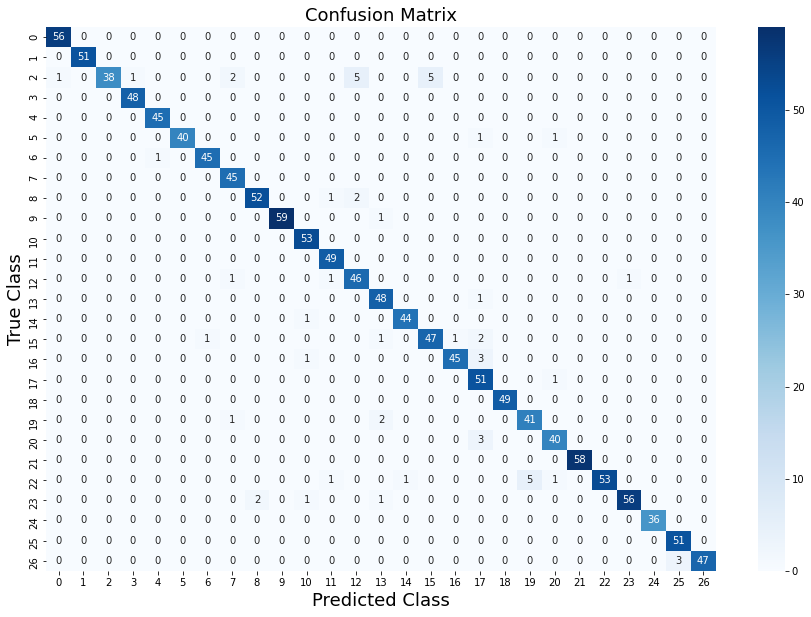

In [11]:
c_m = confusion_matrix(y_test_250, y_pred_250)

fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
s= sns.heatmap(c_m, annot=True, cmap='Blues')
s.set(xlabel='Predicted Class', ylabel='True Class')

In [12]:
FP = c_m.sum(axis=0) - np.diag(c_m) 
FN = c_m.sum(axis=1) - np.diag(c_m)
TP = np.diag(c_m)
TN = c_m.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [13]:
import numpy as np

# Confusion matrix
confusion_matrix = c_m

# Number of classes
num_classes = confusion_matrix.shape[0]

# False negative rate for each class
false_negative_rate = np.zeros(num_classes)

for i in range(num_classes):
    false_negative_rate[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[i,:])
    
print(false_negative_rate)


[1.         1.         0.73076923 1.         1.         0.95238095
 0.97826087 1.         0.94545455 0.98333333 1.         1.
 0.93877551 0.97959184 0.97777778 0.90384615 0.91836735 0.98076923
 1.         0.93181818 0.93023256 1.         0.86885246 0.93333333
 1.         1.         0.94      ]


In [14]:
false_negative_rate = sum(false_negative_rate)
false_negative_rate = false_negative_rate/27
false_negative_rate = 1-false_negative_rate
false_negative_rate

0.04097913629327998

In [15]:
# calculate confusion matrix
conf_matrix = c_m

# calculate false positive rate
fpr = c_m.sum(axis=0) - np.diag(c_m)
fpr = fpr / c_m.sum(axis=0)

fpr = sum(fpr)/27

In [16]:
fpr

0.04049596069500112

### 275 Per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_275 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_275():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_275.append([new_array, class_num])
            if i == 275:
                break

create_training_data_275()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_275)

X_275 = []
y_275 = []

for features, label in training_data_275:
    X_275.append(features)
    y_275.append(label)

X_275 = np.array(X_275).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_275 = X_275/255.0
y_275 = np.array(y_275)

X_train_275, X_test_275, y_train_275, y_test_275 = train_test_split(X_275, y_275, test_size=0.20)

In [ ]:
model_275 = Sequential()

# Step 1 - Convolution
model_275.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_275.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_275.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_275.add(MaxPooling2D(pool_size = (2, 2)))

model_275.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_275.add(MaxPooling2D(pool_size = (2, 2)))

model_275.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_275.add(Flatten())


# Step 4 - Full connection
model_275.add(Dense(128, activation = 'relu'))
model_275.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_275.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_275 = model_275.fit(X_train_275,y_train_275,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_275 = model_275.predict(X_test_275)
y_pred_275 = np.argmax(y_pred_275, axis=-1)
print(classification_report(y_test_275, y_pred_275))

In [ ]:
train_loss_275, train_accuracy_275 = model_275.evaluate(X_train_275, y_train_275)
test_loss_275, test_acc_275 = model_275.evaluate(X_test_275, y_test_275)

In [ ]:
train_loss_275, train_accuracy_275 = model_275.evaluate(X_train_275, y_train_275)
test_loss_275, test_acc_275 = model_275.evaluate(X_test_275, y_test_275)

### 300 per Class

In [ ]:
TRAIN_DATADIR = "./data/ChiplessRFID/train/"
training_data_300 = []
CATEGORIES = ['Tag01', 'Tag02', 'Tag03', 'Tag04','Tag05','Tag06','Tag07','Tag08','Tag09','Tag10','Tag11','Tag12','Tag13',
               'Tag14','Tag15','Tag16','Tag17','Tag18','Tag19','Tag20','Tag21','Tag22','Tag23','Tag24','Tag25','Tag26',
               'Tag27']
IMG_SIZE = 150

def create_training_data_300():
    for category in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        i = 0
        for img in os.listdir(path): 
            i+= 1
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data_300.append([new_array, class_num])
            if i == 300:
                break

create_training_data_300()

In [ ]:
### Shuffling the dataset
import random

random.shuffle(training_data_300)

X_300 = []
y_300 = []

for features, label in training_data_300:
    X_300.append(features)
    y_300.append(label)

X_300 = np.array(X_300).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
X_300 = X_300/255.0
y_300 = np.array(y_300)

X_train_300, X_test_300, y_train_300, y_test_300 = train_test_split(X_300, y_300, test_size=0.20)

In [ ]:
model_300 = Sequential()

# Step 1 - Convolution
model_300.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 1), padding='same', activation = 'relu'))
model_300.add(MaxPooling2D(pool_size = (2, 2)))


# Step 2 - Adding some other convolutional and Maxpool layers
model_300.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_300.add(MaxPooling2D(pool_size = (2, 2)))

model_300.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))
model_300.add(MaxPooling2D(pool_size = (2, 2)))

model_300.add(Convolution2D(32, 3, 3, padding='same', activation = 'relu'))

# Step 3 - Flattening
model_300.add(Flatten())


# Step 4 - Full connection
model_300.add(Dense(128, activation = 'relu'))
model_300.add(Dense(27, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN

# adam = Adam()
model_300.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# train model
history_300 = model_300.fit(X_train_300,y_train_300,
    batch_size=10,
    epochs=20,
    validation_split=0.10)

In [ ]:
y_pred_300 = model_300.predict(X_test_300)
y_pred_300 = np.argmax(y_pred_300, axis=-1)
print(classification_report(y_test_300, y_pred_300))

In [ ]:
train_loss_300, train_accuracy_300 = model_300.evaluate(X_train_300, y_train_300)
test_loss_300, test_acc_300 = model_300.evaluate(X_test_300, y_test_300)

In [ ]:
train_loss_300, train_accuracy_300 = model_300.evaluate(X_train_300, y_train_300)
test_loss_300, test_acc_300 = model_300.evaluate(X_test_300, y_test_300)

# Data Visualization

In [ ]:
# imports
import seaborn as sns
import numpy as np
import pandas as pd

Sig_acc = np.array([0.89, 0.91, 0.93, 0.95,0.96,0.96,0.96,0.96])
Sof_acc = np.array([0.85, 0.86, 0.90, 0.96,0.93,0.96,0.96,0.97])

Sig_loss = np.array([0.31,0.27,0.19,0.15,0.12,0.14,0.12,0.13])
Sof_loss = np.array([0.24,0.29,0.14,0.15,0.20,0.10,0.09,0.04])



# convert to pandas dataframe
d = {'Sig_acc': Sig_acc, 'Sof_acc': Sof_acc}
pdnumsqr = pd.DataFrame(d)

sns.set(style='darkgrid')
sns.lineplot(x='Sig_acc', y='Sof_acc', data=pdnumsqr)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

count = [75,100,125,150,175,200,225,250]

# Create some sample data
x1 = count
y1 = np.array([0.89, 0.91, 0.93, 0.95,0.96,0.96,0.96,0.96])

x2 = count
y2 = [0.85, 0.86, 0.90, 0.96,0.93,0.96,0.96,0.97]


# Create the lineplot
sns.lineplot(x=x1, y=y1, label="Sigmoid")
sns.lineplot(x=x2, y=y2, label="SoftMax")

plt.xlabel("Data Used to Train Model")
plt.ylabel("Testing Accuracy")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

count = [75,100,125,150,175,200,225,250]

# Create some sample data
x1 = count
y1 = np.array([0.31,0.27,0.19,0.15,0.12,0.14,0.12,0.13])

x2 = count
y2 = np.array([0.24,0.29,0.14,0.15,0.20,0.10,0.09,0.04])


# Create the lineplot
sns.lineplot(x=x1, y=y1, label="Sigmoid")
sns.lineplot(x=x2, y=y2, label="SoftMax")

plt.xlabel("Data Used to Train Model")
plt.ylabel("Training Loss")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

count = [75,100,125,150,175,200,225,250]

# Create some sample data
x1 = count
y1 = np.array([0.89,0.92,0.91,0.96,0.96,0.96,0.96,0.96])

x2 = count
y2 = np.array([0.85,0.92,0.91,0.96,0.94,0.96,0.97,0.97])


# Create the lineplot
sns.lineplot(x=x1, y=y1, label="Sigmoid")
sns.lineplot(x=x2, y=y2, label="SoftMax")

plt.xlabel("Data Used to Train Model")
plt.ylabel("F-1 Score")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

